In [1]:
# Data processing
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Interactive chart
import ipywidgets as widgets
from ipywidgets import interact

# Ignorer les alertes pandas
import warnings
warnings.filterwarnings("ignore")

# Module externe
from module import *

In [4]:
# Chemins des fichiers CSV
data_file_path = 'Datasets/telecom_custumerDB.csv'

# Chargement des données d'entraînement et de test dans des DataFrames pandas
data = pd.read_csv(data_file_path)

# Affichage des cinq premières lignes du jeu de données d'entraînement
print("Data:")
data.head()


Data:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
# Dimensionnalité du jeu de données
data.shape

(7043, 21)

In [6]:
# Statistiques descriptive données d'entrainement
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
# Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [16]:
# Valeurs uniques par colonne
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

### Data visualisation

In [17]:
# Variable categorielles
categorical_columns = df.nunique()[df.nunique() < 5].keys().to_list()
categorical_columns

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [21]:
# Interact, barplot
interact(bar_plot, Variable = categorical_columns)

interactive(children=(Dropdown(description='Variable', options=('gender', 'SeniorCitizen', 'Partner', 'Depende…

<function __main__.bar_plot(Variable)>

In [22]:
# Verifier le type de 'TotalCharges'
data['TotalCharges'].sample(10)

3477    1345.75
6539     1959.5
3731     146.65
4609     1466.1
5601     1383.6
5852    1474.75
1063     612.95
1200       3778
2803     779.25
6796     113.55
Name: TotalCharges, dtype: object

In [23]:
# Variables quantitatives
numerical_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Convertire le type de 'TotalCharges' en float
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

In [36]:
# Interact, histogramme
interact(hist_plot, Variables = numerical_columns);

interactive(children=(Dropdown(description='Variables', options=('tenure', 'MonthlyCharges', 'TotalCharges'), …

In [38]:
# Coefficient d'asymetrie 'TotalCharges'
data['TotalCharges'].skew()

0.961642499724251

In [42]:
# Interact, boites à moustaches 
interact(box_plot, Variable = numerical_columns);

interactive(children=(Dropdown(description='Variable', options=('tenure', 'MonthlyCharges', 'TotalCharges'), v…

In [ ]:
# Création du nuage de points de mean en fonction de sd
scatter_plot = px.scatter(data, x='mean', y='sd', title='Nuage de points: Données entrainement - Dépense moyenne vs sd')

# Affichage du nuage de points
scatter_plot.show()

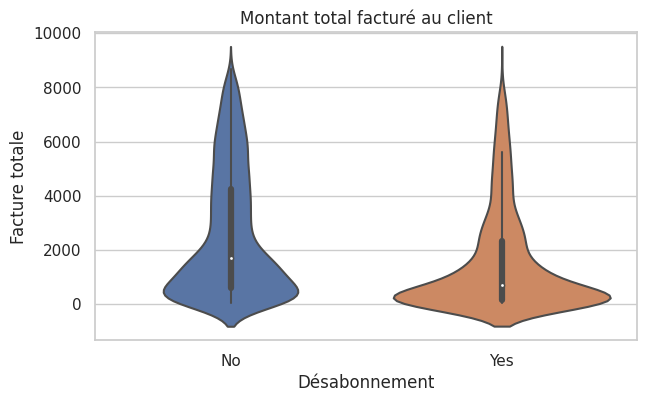

In [64]:
# TotalCharges VS Churn
sns.violinplot(x='Churn', y='TotalCharges', data=data)
plt.xlabel('Désabonnement', size=12)
plt.ylabel('Facture totale')
plt.title('Montant total facturé au client')
plt.show()

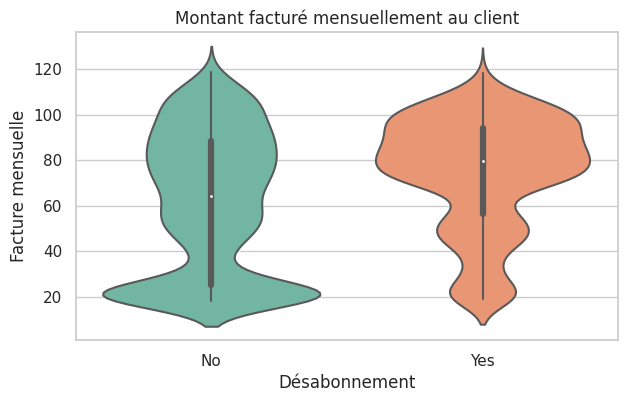

In [50]:
# MonthlyCharges VS Churn 
sns.violinplot(x='Churn', y='MonthlyCharges', data=data, palette='Set2')
sns.set(style="whitegrid") 
plt.xlabel('Désabonnement', size=12)
plt.ylabel('Facture mensuelle')
plt.title('Montant facturé mensuellement au client')
plt.show()

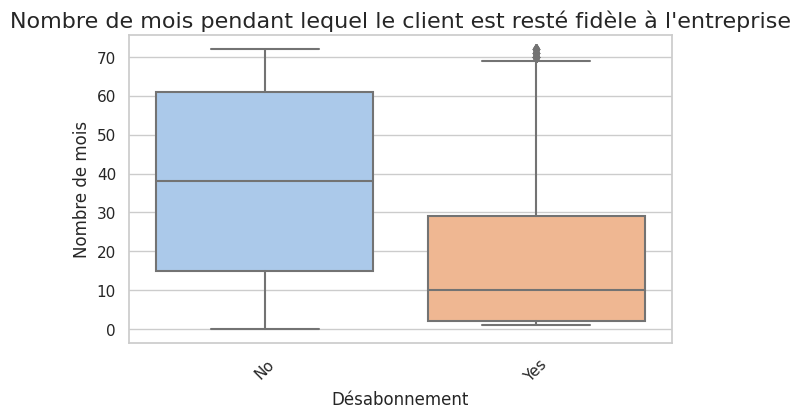

In [49]:
# tenure Vs Churn
sns.boxplot(x='Churn', y='tenure', data=data, palette=sns.color_palette("pastel"))
sns.set(style="whitegrid")
plt.xlabel('Désabonnement', size=12)
plt.ylabel('Nombre de mois')
plt.title("Nombre de mois pendant lequel le client est resté fidèle à l'entreprise", size=16)
plt.show()


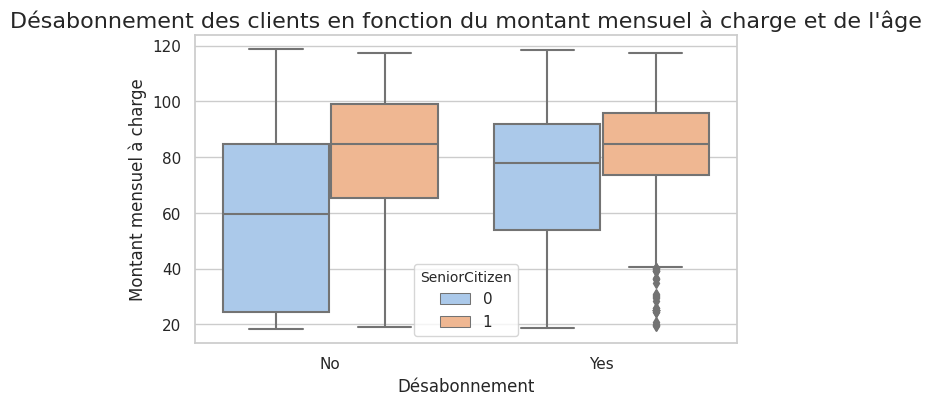

In [71]:
# Boîte à moustaches avec la distinction SeniorCitizen
sns.boxplot(x='Churn', y='MonthlyCharges', data= data, hue='SeniorCitizen', palette=sns.color_palette("pastel"))
sns.set(style="whitegrid")
plt.xlabel('Désabonnement', size=12)
plt.ylabel('Montant mensuel à charge', size=12)
plt.title("Désabonnement des clients en fonction du montant mensuel à charge et de l'âge", size=16)
plt.legend(title='SeniorCitizen', title_fontsize='10')
plt.show()

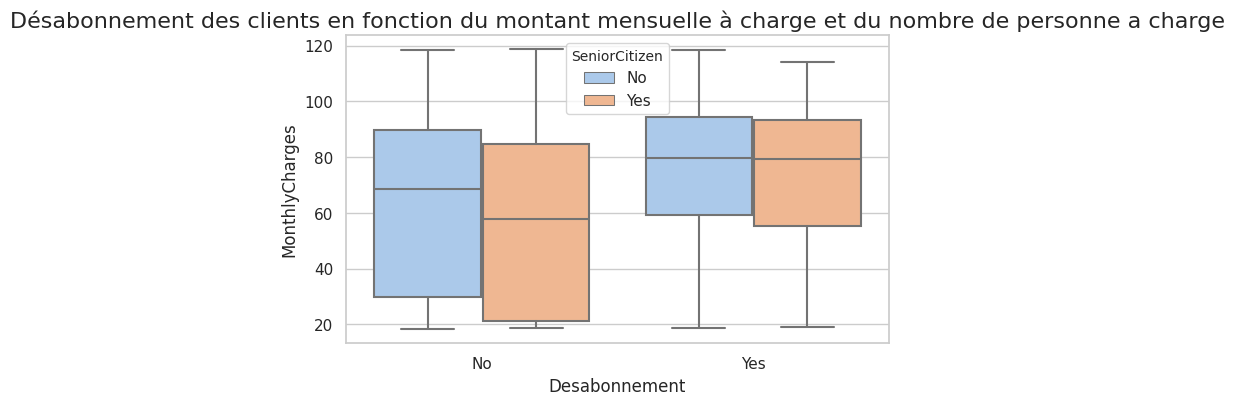

In [70]:
# MonthlyCharges VS Churn by Dependents
sns.boxplot( x = 'Churn', y = 'MonthlyCharges', data = data, hue = 'Dependents', palette=sns.color_palette("pastel"))
sns.set(style="whitegrid")
plt.xlabel('Desabonnement', size =12)
plt.ylabel('MonthlyCharges', size =12)
plt.title("Désabonnement des clients en fonction du montant mensuelle à charge et du nombre de personne a charge", size =16)
plt.legend(title='SeniorCitizen', title_fontsize='10')
plt.show()

In [69]:
# Résumé statistique
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


### Data preprocessing

In [72]:
# Gestion des valeurs manquantes
df_copy = data.copy()

# Valeurs manquantes par variable
df_copy.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [73]:
# Suppression vm
df_copy.dropna(inplace = True)

In [74]:
# Encodage variable binaire gender
df_copy['gender'] = df_copy['gender'].apply(lambda row: 1 if row == 'Male' else 0)

# Liste contenant tout les variables binaire excepter gender
binary_columns = df_copy.drop('gender', axis=1).nunique()[df_copy.drop('gender', axis=1).nunique() < 3].keys().to_list()
binary_columns

['SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'PaperlessBilling',
 'Churn']

In [76]:
# Encodage des columns categorique
for column in binary_columns:
  df_copy[column] = df_copy[column].apply(lambda row: 1 if row == 'Yes' else 0)

In [77]:
# liste variables categorielles +3 modalités
remaining = df_copy[categorical_columns].nunique()[df_copy[categorical_columns].nunique() > 2].keys().to_list()

#Encodage
remaining_dummies = pd.get_dummies(data = df_copy[remaining], columns = remaining, drop_first=True)

In [79]:
# Nouvelle dataframe
df_copy = pd.concat([df_copy['gender'], df_copy[binary_columns], remaining_dummies, data[numerical_columns]], axis = 1)

# Affichage de la DataFrame
df_copy.head(10)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,29.85,29.85
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,34,56.95,1889.50
2,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2,53.85,108.15
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,45,42.30,1840.75
4,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2,70.70,151.65
5,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,8,99.65,820.50
6,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,22,89.10,1949.40
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,10,29.75,301.90
8,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,28,104.80,3046.05
9,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,62,56.15,3487.95


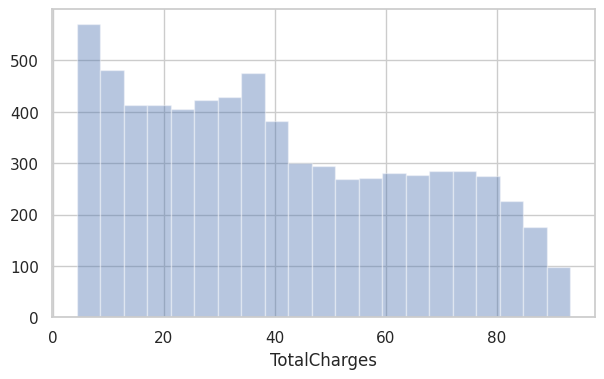

In [80]:
# Resolution assymetrie 'TotalCharges'
df_copy['TotalCharges'] = np.sqrt(df_copy['TotalCharges'])

# Histogramme de la variables transformée
sns.distplot(df_copy['TotalCharges'], kde = False);


In [83]:
# Coéfficient d'asymétrie 'TotalCharge'
print("Avant résolution:", data['TotalCharges'].skew(), "\n")
print("Après résolution:", df_copy['TotalCharges'].skew())

Avant résolution: 0.961642499724251 

Après résolution: 0.3089261418986736


In [89]:
Features = df_copy.drop('Churn', axis =1)
Labels = df_copy['Churn']

In [92]:
# Sauvegarde des data
Features.to_csv('feature_clean.csv', index=False)
Labels.to_csv('labels_clean.csv', index=False)